In [1]:
import xarray as xr
import math
from pathlib import Path
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import box
import pandas as pd
import numpy as np

In [11]:
data_path = Path('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned')
zarr_file_list = list(data_path.glob('*.zarr'))
zarr_file_list

[PosixPath('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned/236959227904_Euterpe_edulis.zarr'),
 PosixPath('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned/762290529280_Cryptomeria_japonica.zarr'),
 PosixPath('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned/438312372224_Eucalyptus_sp..zarr'),
 PosixPath('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned/318213318656_Archontophoenix_cunninghamiana.zarr'),
 PosixPath('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned/245146887168_Pinus_elliottii.zarr'),
 PosixPath('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned/928764938240_Cecropia_sp.zarr'),
 PosixPath('/home/oku/Developments/XAI4GEO/data/brazil_data/tree_labels_cleaned/267652544512_Syagrus_romanzoffiana.zarr')]

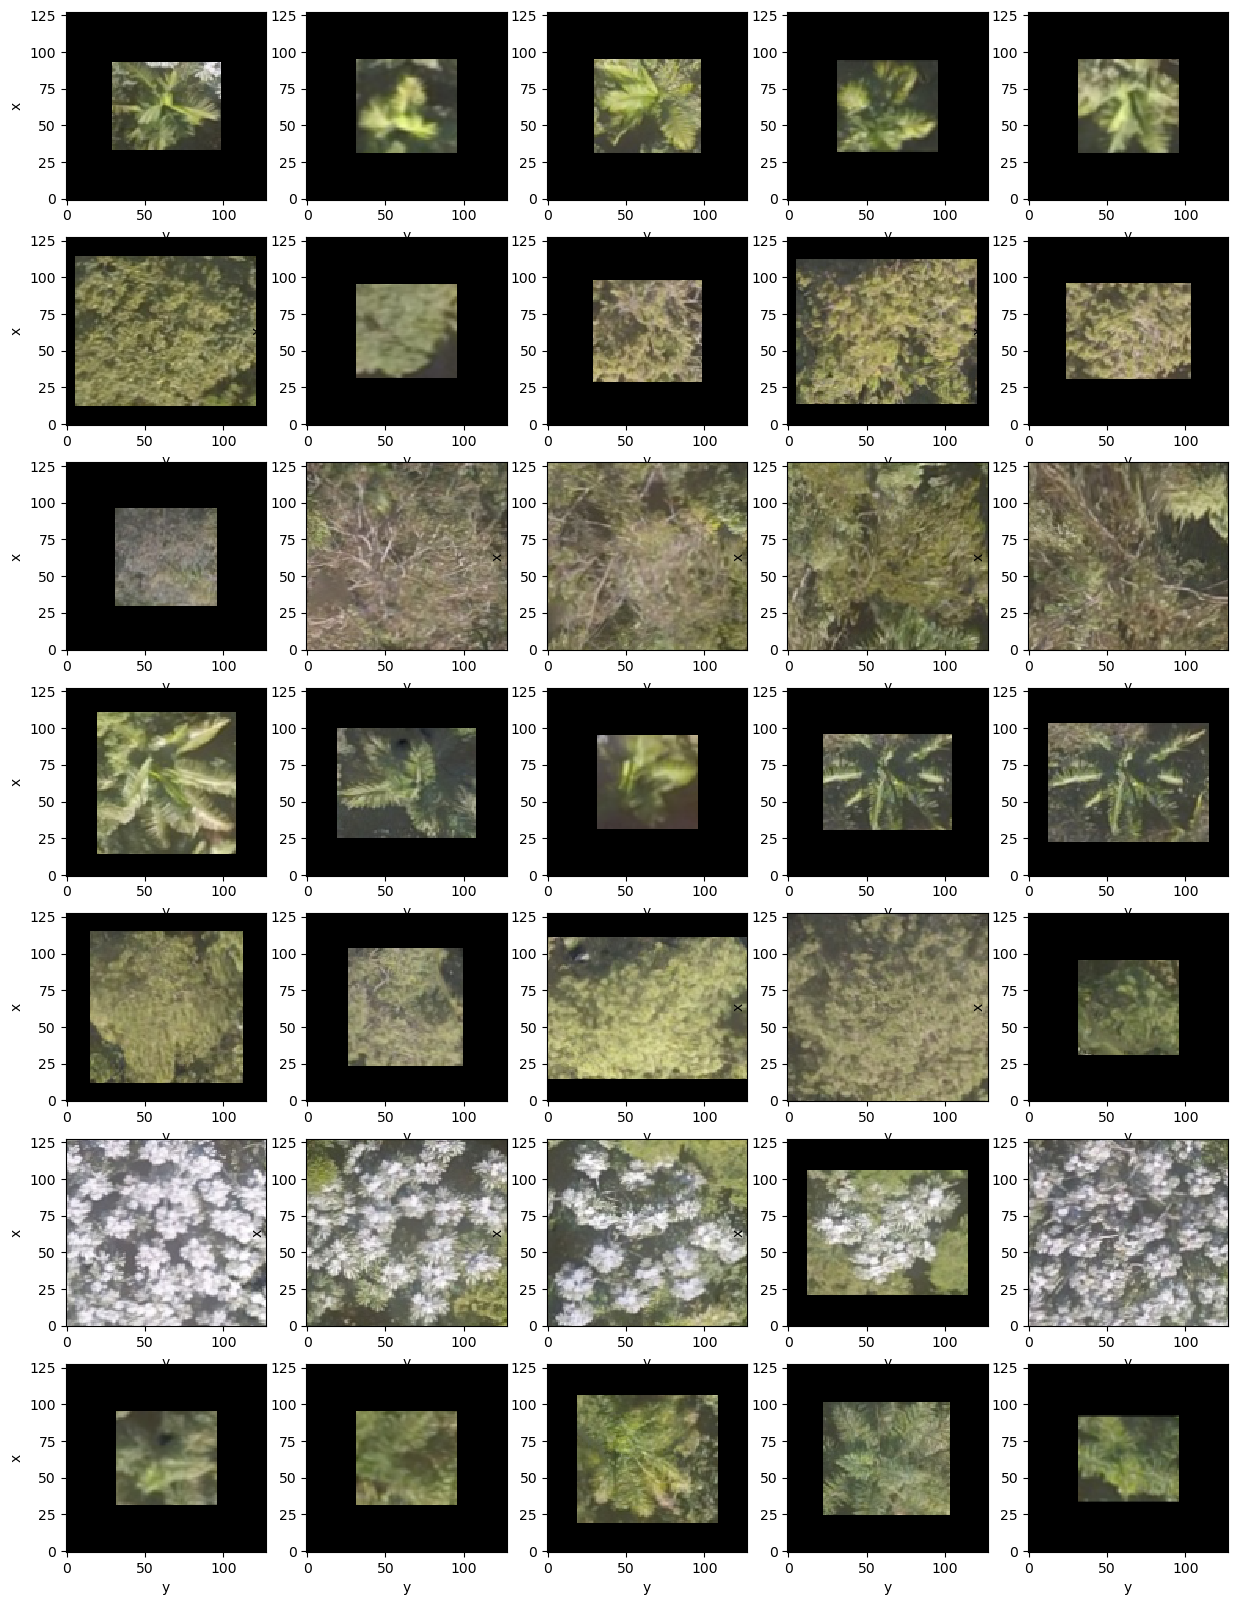

In [13]:
# Plot 5 samples per dataset
# make each dataset a row in subplot

fig, axs = plt.subplots(len(zarr_file_list), 5, figsize=(15, 20))
for i, zarr_file in enumerate(zarr_file_list):
    ds = xr.open_zarr(zarr_file)
    for j in range(5):
        cutout = ds['X'].isel(sample=j)/255.
        cutout.plot.imshow(ax=axs[i, j])
    

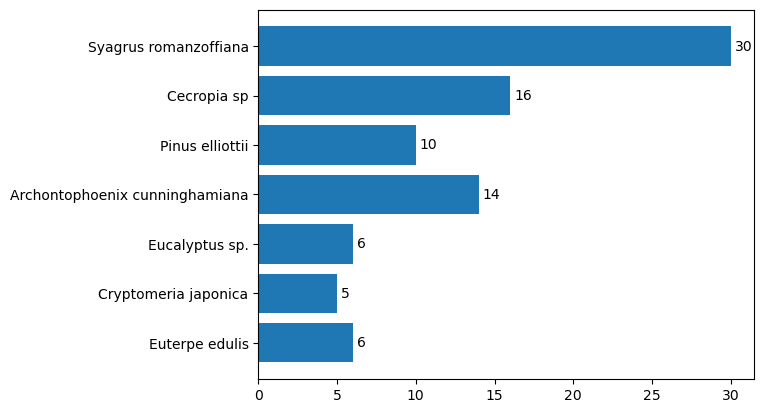

In [31]:
# Make a horizontal bar plot of the number of samples per dataset
ds_list = [xr.open_zarr(zarr_file) for zarr_file in zarr_file_list]
n_samples = [ds.sizes['sample'] for ds in ds_list]
labels = [ds.attrs[str(ds['Y'].isel(sample=0).values.astype(int))]['ESPECIE'] for ds in ds_list]

fig, ax = plt.subplots()
ax.barh(labels, n_samples)
# add number of samples to the right of the bars
for i, v in enumerate(n_samples):
    ax.text(v + 0.25, i, str(v), color='black', va='center')

## Data pairs one shot learning